In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
%matplotlib inline
import warnings
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator


warnings.filterwarnings('ignore')


pd.pandas.set_option('display.max_columns',None)

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Balanced/balanced_resized_dataset_64x64.csv')

In [4]:
IMG_H=64
IMG_W=64

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dataset.drop(columns=['label']), dataset['label'], test_size=0.2, random_state=42)

In [6]:
import gc
del dataset
gc.collect()

4

In [7]:
classes={0:('actinic keratoses and intraepithelial carcinomae(Cancer)'),
         1:('basal cell carcinoma(Cancer)'),
         2:('benign keratosis-like lesions(Non-Cancerous)'),
         3:('dermatofibroma(Non-Cancerous)'),
         4:('melanocytic nevi(Non-Cancerous)'),
         5:('pyogenic granulomas and hemorrhage(Can lead to cancer)'),
         6:('melanoma(Cancer)')}

In [8]:
for k in range(7):
  print("Number of ", classes[k],"images: ", len([i for i in y_train if i==k]))

Number of  actinic keratoses and intraepithelial carcinomae(Cancer) images:  2801
Number of  basal cell carcinoma(Cancer) images:  2812
Number of  benign keratosis-like lesions(Non-Cancerous) images:  2819
Number of  dermatofibroma(Non-Cancerous) images:  2828
Number of  melanocytic nevi(Non-Cancerous) images:  2774
Number of  pyogenic granulomas and hemorrhage(Can lead to cancer) images:  2758
Number of  melanoma(Cancer) images:  2808


In [9]:
x_train = x_train.values.reshape(-1, IMG_H,IMG_W, 3)
x_test = x_test.values.reshape(-1, IMG_H,IMG_W, 3)

x_train = x_train / 255.0
x_test = x_test / 255.0


y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

### Training1

In [ ]:
from tensorflow.keras.applications import *
from tensorflow.keras.layers import Flatten, Dense, Input, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [ ]:
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(IMG_H, IMG_W, 3))

for layer in base_model.layers:
    layer.trainable = True

x = base_model.output
x = Flatten()(x)
# x = Dense(4096, activation='relu')(x)
# x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(7, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=x)


model.summary()
optimizer = Adam(0.0001)
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 64, 64, 3)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d            │ (None, 70, 70, 3)      │              0 │ input_layer[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 32, 32, 64)     │          9,408 │ zero_padding2d[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 32, 32, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 32, 32, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_1          │ (None, 34, 34, 64)     │              0 │ conv1_relu[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1 (MaxPooling2D)      │ (None, 16, 16, 64)     │              0 │ zero_padding2d_1[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_bn         │ (None, 16, 16, 64)     │            256 │ pool1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_relu       │ (None, 16, 16, 64)     │              0 │ conv2_block1_0_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 16, 16, 128)    │          8,192 │ conv2_block1_0_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 16, 16, 128)    │            512 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 16, 16, 128)    │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 16, 16, 32)     │         36,864 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_concat       │ (None, 16, 16, 96)     │              0 │ pool1[0][0],           │
│ (Concatenate)             │                        │                │ conv2_block1_2_conv[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block2_0_bn    

 Total params: 7,562,823 (28.85 MB)

 Trainable params: 7,479,175 (28.53 MB)

 Non-trainable params: 83,648 (326.75 KB)

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

lr_reduce = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=2,mode='max', min_lr=0.00001,verbose=1)
early_stop = EarlyStopping(monitor="val_loss", patience=2, verbose=1)
model_chkpt = ModelCheckpoint('artifacts/DenseNet121/best_densenet_model_new.keras',save_best_only=True, monitor='val_accuracy',verbose=1)

callback_list = [model_chkpt,lr_reduce]

In [ ]:
history = model.fit(x_train,
                      y_train,
                      validation_split=0.2,
                      batch_size=256,
                      epochs=20,
                      shuffle=True,
                      callbacks=callback_list)

Epoch 1/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 17s/step - accuracy: 0.3003 - loss: 2.1900 
Epoch 1: val_accuracy improved from -inf to 0.31505, saving model to artifacts/DenseNet121/best_densenet_model_new.keras
62/62 ━━━━━━━━━━━━━━━━━━━━ 1237s 18s/step - accuracy: 0.3018 - loss: 2.1828 - val_accuracy: 0.3151 - val_loss: 1.9403 - learning_rate: 1.0000e-04
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 17s/step - accuracy: 0.6150 - loss: 1.0254 
Epoch 2: val_accuracy improved from 0.31505 to 0.48980, saving model to artifacts/DenseNet121/best_densenet_model_new.keras
62/62 ━━━━━━━━━━━━━━━━━━━━ 1145s 18s/step - accuracy: 0.6153 - loss: 1.0247 - val_accuracy: 0.4898 - val_loss: 1.3387 - learning_rate: 1.0000e-04
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 16s/step - accuracy: 0.7353 - loss: 0.7133 
Epoch 3: val_accuracy improved from 0.48980 to 0.60179, saving model to artifacts/DenseNet121/best_densenet_model_new.keras
62/62 ━━━━━━━━━━━━━━━━━━━━ 1100s 18s/step - accuracy: 0.7354 - loss: 0.7130 - val_ac

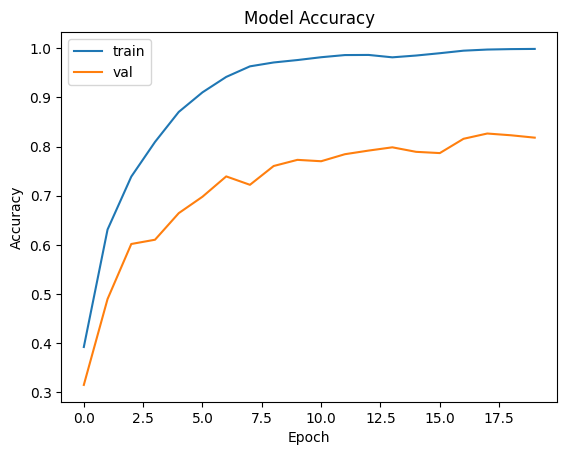

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

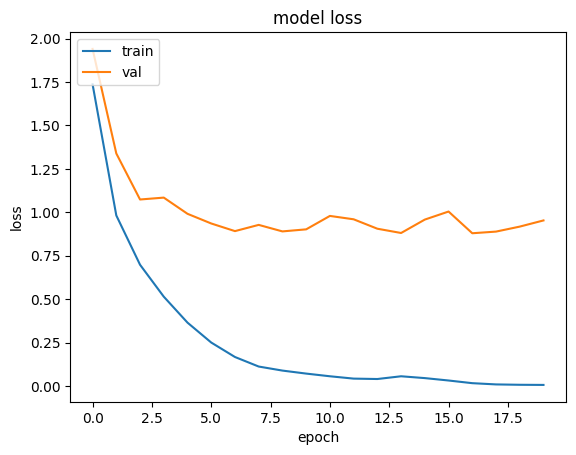

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
save_path = '/content/drive/MyDrive/artifacts/DenseNet121/best_densenet_model_new.keras'
model.save(save_path)

In [ ]:
loss, acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {acc*100:.2f}%")

154/154 - 64s - 418ms/step - accuracy: 0.8224 - loss: 0.9372
Test accuracy: 82.24%


### Training 2

In [10]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

In [11]:
# Load base model
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(IMG_H, IMG_W, 3))

# Freeze initial layers
for layer in base_model.layers[:100]:
    layer.trainable = False

# Build the model
x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(x)  # L2 Regularization
x = Dropout(0.3)(x)  # Slightly reduced dropout
x = Dense(7, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=x)


model.summary()


# Compile model with a slightly higher learning rate initially
optimizer = Adam(learning_rate=0.001)
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

# Callbacks
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=1, mode='min', min_lr=0.00001, verbose=1)
early_stop = EarlyStopping(monitor="val_loss", patience=3, verbose=1)  # Increased patience
model_chkpt = ModelCheckpoint('artifacts/DenseNet121/best_densenet_model.keras', save_best_only=True, monitor='val_accuracy', verbose=1)

callback_list = [model_chkpt, lr_reduce, early_stop]


29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 64, 64, 3)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d            │ (None, 70, 70, 3)      │              0 │ input_layer[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 32, 32, 64)     │          9,408 │ zero_padding2d[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 32, 32, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 32, 32, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_1          │ (None, 34, 34, 64)     │              0 │ conv1_relu[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1 (MaxPooling2D)      │ (None, 16, 16, 64)     │              0 │ zero_padding2d_1[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_bn         │ (None, 16, 16, 64)     │            256 │ pool1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_relu       │ (None, 16, 16, 64)     │              0 │ conv2_block1_0_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 16, 16, 128)    │          8,192 │ conv2_block1_0_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 16, 16, 128)    │            512 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 16, 16, 128)    │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 16, 16, 32)     │         36,864 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_concat       │ (None, 16, 16, 96)     │              0 │ pool1[0][0],           │
│ (Concatenate)             │                        │                │ conv2_block1_2_conv[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block2_0_bn    

 Total params: 7,562,823 (28.85 MB)

 Trainable params: 6,674,503 (25.46 MB)

 Non-trainable params: 888,320 (3.39 MB)

In [ ]:
history = model.fit(x_train,
                      y_train,
                      validation_split=0.2,
                      batch_size=256,
                      epochs=20,
                      shuffle=True,
                      callbacks=callback_list)

Epoch 1/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4688 - loss: 1.8451   
Epoch 1: val_accuracy improved from -inf to 0.48520, saving model to artifacts/DenseNet121/best_densenet_model.keras
62/62 ━━━━━━━━━━━━━━━━━━━━ 224s 2s/step - accuracy: 0.4707 - loss: 1.8368 - val_accuracy: 0.4852 - val_loss: 2.1556 - learning_rate: 0.0010
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.7550 - loss: 0.7997
Epoch 2: val_accuracy improved from 0.48520 to 0.64796, saving model to artifacts/DenseNet121/best_densenet_model.keras
62/62 ━━━━━━━━━━━━━━━━━━━━ 45s 179ms/step - accuracy: 0.7553 - loss: 0.7987 - val_accuracy: 0.6480 - val_loss: 1.5706 - learning_rate: 0.0010
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.8390 - loss: 0.5586
Epoch 3: val_accuracy improved from 0.64796 to 0.68597, saving model to artifacts/DenseNet121/best_densenet_model.keras
62/62 ━━━━━━━━━━━━━━━━━━━━ 20s 174ms/step - accuracy: 0.8391 - loss: 0.5584 - val_accuracy: 0.6860 - va

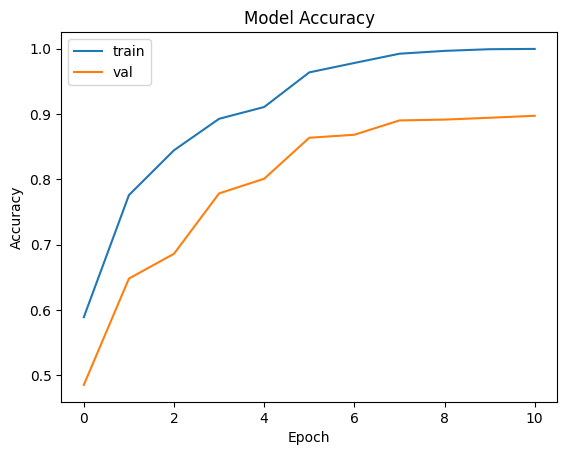

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

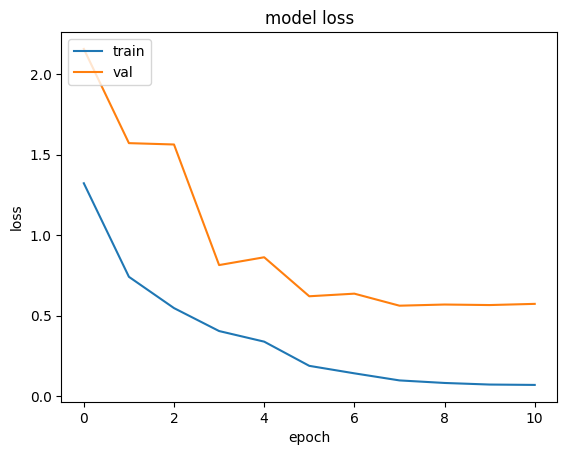

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
save_path = '/content/drive/MyDrive/artifacts/DenseNet121/best_densenet_model_new2.keras'
model.save(save_path)

In [ ]:
loss, acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {acc*100:.2f}%")

154/154 - 19s - 127ms/step - accuracy: 0.9014 - loss: 0.5622
Test accuracy: 90.14%


In [12]:
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the best model
best_model = keras.models.load_model('/content/drive/MyDrive/artifacts/DenseNet121/best_densenet_model_new2.keras')

# Evaluate model accuracy
loss, acc = best_model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy of the best model: {acc*100:.2f}%")

# Get model predictions
y_pred_prob = best_model.predict(x_test)  # Get probability outputs

# Convert probabilities to class labels (for multi-class classification)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)  # If y_test is one-hot encoded

# Print classification report
print(classification_report(y_true, y_pred))

154/154 - 29s - 187ms/step - accuracy: 0.9014 - loss: 0.5622
Test accuracy of the best model: 90.14%
154/154 ━━━━━━━━━━━━━━━━━━━━ 23s 81ms/step
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       699
           1       0.93      0.92      0.92       688
           2       0.81      0.80      0.80       681
           3       0.98      1.00      0.99       672
           4       0.89      0.87      0.88       726
           5       1.00      1.00      1.00       742
           6       0.82      0.77      0.80       692

    accuracy                           0.90      4900
   macro avg       0.90      0.90      0.90      4900
weighted avg       0.90      0.90      0.90      4900



In [13]:
# Generate classification report as a dictionary
report = classification_report(y_true, y_pred, output_dict=True)

# Extract single precision & recall
precision = report["weighted avg"]["precision"]
recall = report["weighted avg"]["recall"]

print(f"Overall Precision: {precision:.2f}")
print(f"Overall Recall: {recall:.2f}")


Overall Precision: 0.90
Overall Recall: 0.90


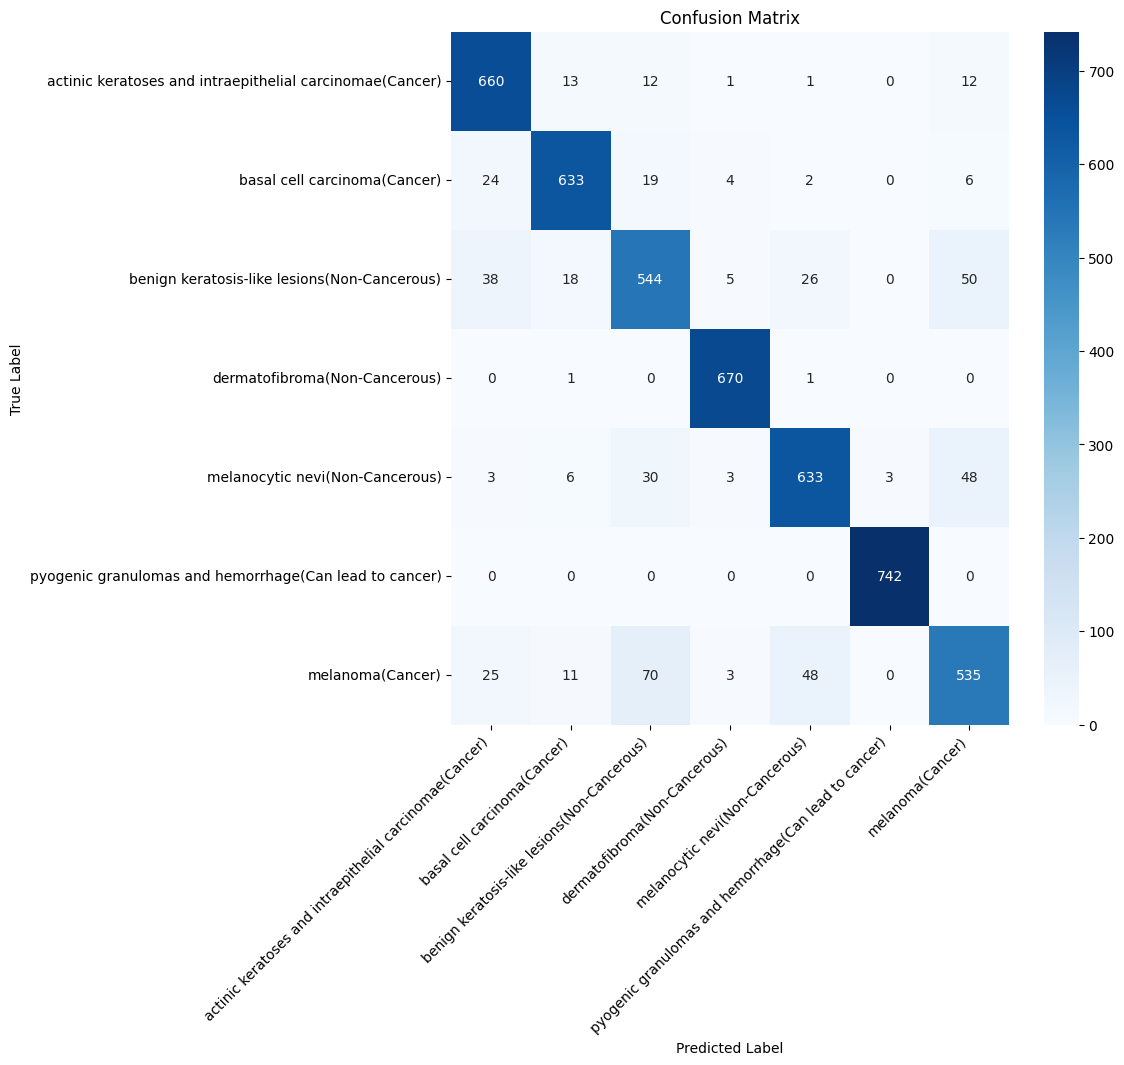

Classification Report:
                                                           precision    recall  f1-score   support

actinic keratoses and intraepithelial carcinomae(Cancer)       0.88      0.94      0.91       699
                            basal cell carcinoma(Cancer)       0.93      0.92      0.92       688
            benign keratosis-like lesions(Non-Cancerous)       0.81      0.80      0.80       681
                           dermatofibroma(Non-Cancerous)       0.98      1.00      0.99       672
                         melanocytic nevi(Non-Cancerous)       0.89      0.87      0.88       726
  pyogenic granulomas and hemorrhage(Can lead to cancer)       1.00      1.00      1.00       742
                                        melanoma(Cancer)       0.82      0.77      0.80       692

                                                accuracy                           0.90      4900
                                               macro avg       0.90      0.90      0.90     

In [14]:
class_names = [classes[i] for i in range(len(classes))]  # Converting dict to ordered list

# Generating the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(9, 9))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)
plt.show()

print("Classification Report:\n", classification_report(y_true, y_pred, target_names=class_names))
